# Ranking Feature Importance With Random Forest and Logistic Regression

### Information About Dataset
* Any 9 in the dataset represents Nan
* Feature PSys is the target class 
* 1 in column PSys means the nation is peaceful
* 2 in column PSys means the nation is not peaceful

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import os
import seaborn as sns


# function that loads csv
def load_peace_sys_data():
    df = pd.DataFrame(pd.read_csv('peace_sys.csv', index_col=0, na_values=['(NA)']))
    return df

# Data Loading and Overview

In [6]:
# loading the dataset
peace_sys = load_peace_sys_data()

peace_sys.head()    

,SCCS,Coder,ID1.1Over,ID1.2Ethno,Int2.1Mar,Int2.2Econ,Int2.3Pol,Int2.4Hist,Dep3.1Sec,Dep3.2Ecol,...,CM8.5Peace,CM8.6War,Lead9.1P,Lead9.2War,Cult10.1Com,Cult10.2Diff,Comp10.3,InComp10.4,PSys,CMoverall
Name,,,,,,,,,,,,,,,,,,,,,
Gilbertese,107,KA,9,2,3,9,9,9,9,9,...,9,9,9,9,9,9,9,9,2,9
Marshallese,108,EC,1,9,9,1,9,9,9,9,...,9,2,9,4,9,9,9,9,2,2
E. Pomo,135,"KA, EC",9,9,9,9,9,9,1,1,...,9,9,2,9,9,9,9,9,2,2
Popoluca,154,KA,9,3,9,3,9,9,9,3,...,9,9,9,9,9,9,9,9,2,9
Konso,35,KA,9,2,3,4,9,4,9,2,...,9,9,9,9,3,9,3,3,2,9


In [7]:
peace_sys = peace_sys.drop(['SCCS','Coder','CMoverall'], axis=1)
peace_sys

,ID1.1Over,ID1.2Ethno,Int2.1Mar,Int2.2Econ,Int2.3Pol,Int2.4Hist,Dep3.1Sec,Dep3.2Ecol,Dep3.3Econ,NWVal4.1,...,CM8.4Adj,CM8.5Peace,CM8.6War,Lead9.1P,Lead9.2War,Cult10.1Com,Cult10.2Diff,Comp10.3,InComp10.4,PSys
Name,,,,,,,,,,,,,,,,,,,,,
Gilbertese,9,2,3,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,2
Marshallese,1,9,9,1,9,9,9,9,3,4,...,9,9,2,9,4,9,9,9,9,2
E. Pomo,9,9,9,9,9,9,1,1,1,2.5,...,9,9,9,2,9,9,9,9,9,2
Popoluca,9,3,9,3,9,9,9,3,3,3,...,9,9,9,9,9,9,9,9,9,2
Konso,9,2,3,4,9,4,9,2,3,3,...,9,9,9,9,9,3,9,3,3,2
Bribri,9,2,2,9,9,9,9,9,9,2,...,9,9,9,9,9,9,9,9,9,2
Tallensi,1,2,4,9,1,3,3,9,2,4,...,2,2,9,9,9,4,1,3,9,2
Russians,4,9,1,9,9,9,9,9,9,9,...,2,2,1,1,9,2,9,9,9,2
Trukese,3,9,4,4,3,9,3,9,3,3,...,4,9,9,9,9,9,9,9,9,2


In [8]:
# remove nations that are not classified
peace_sys = peace_sys[peace_sys.PSys != ' ']

# replace empty spaces and 9's with NaN
peace_sys = peace_sys.replace('9', np.nan)
peace_sys = peace_sys.replace(' ', np.nan)

In [9]:
# Changing every data point to float
cols = peace_sys.columns
peace_sys[cols] = peace_sys[cols].apply(pd.to_numeric)

In [10]:
print(f'There are {peace_sys.isnull().any().sum()} columns in train dataset with missing values.')

There are 32 columns in train dataset with missing values.


# Data Exploration

Text(0.5, 1.0, 'Distibution of PSys variable')

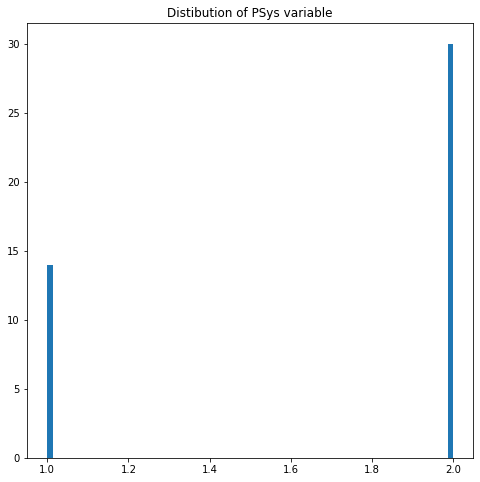

In [11]:
plt.rcParams['figure.figsize'] = (8, 8)
plt.hist(peace_sys['PSys'], bins=77)
plt.title('Distibution of PSys variable')

The feature **PSys** is our target class. We can see that there is a **class imbalance** in the dataset. There is twice as many nations that are categorized as '2' than '1'. In an attempt to fix this we will later apply **SMOTE** to the dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f46b290>,
      dtype=object)

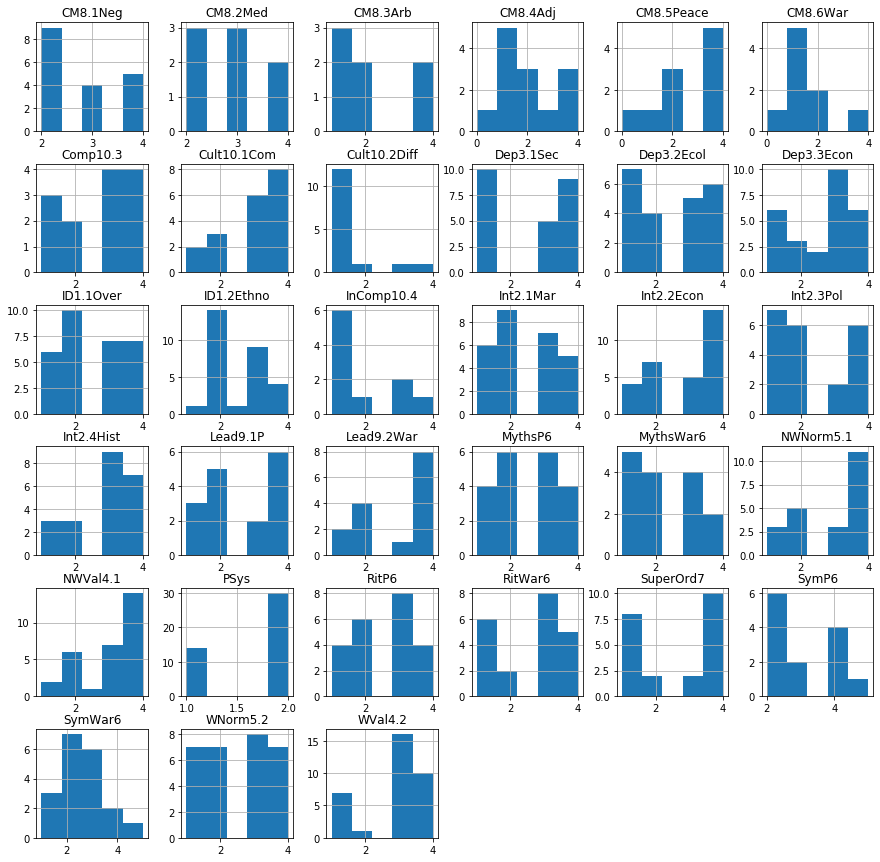

In [12]:
plt.rcParams['figure.figsize'] = (15, 15)
peace_sys.hist(bins=5)

# Cleaning Dataset

In [13]:
peace_sys.fillna(0.0, inplace=True)

### Implementing SMOTE to dataset
SMOTE (synthetic minority oversampling technique) works by finding two near neighbours in a minority class, producing a new point midway between the two existing points and adding that new point in to the sample. The example shown is in two dimensions, but SMOTE will work across multiple dimensions (features). SMOTE therefore helps to ‘fill in’ the feature space occupied by minority classes.

In [14]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=27, sampling_strategy='minority')

In [15]:
y = peace_sys.PSys
X = peace_sys.drop('PSys', axis=1)

### Generating Training and Test Set

In [16]:
# generating train_set and test_set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, stratify=y, random_state=42)

X_train, y_train = sm.fit_sample(X_train, y_train)


# Random Forest

In [17]:
rfc = RandomForestClassifier(n_estimators=2000).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

### Performance

In [18]:
print('Accuracy: ', accuracy_score(y_test, rfc_pred))
print('F1 Score: ', f1_score(y_test, rfc_pred, average='weighted'))
print('Recall Score: ', recall_score(y_test, rfc_pred, average='weighted'))

Accuracy:  0.9375
F1 Score:  0.9353864734299517
Recall Score:  0.9375


### Confusion Matrix
|   |P  |N  |
|---|---|---|
|P  |TP |FN |
|N  |FP |TN | 


In [19]:
# Using a confusion matrix we can evaluate the performance of the model
# The fundamental of confusion matrix is the number of correct and incorrect
# predictions are summed up class-wise
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, rfc_pred)

cnf_matrix

array([[ 4,  1],
       [ 0, 11]])

# Feature Importance For Random Forest

In [20]:
rfc_importances = rfc.feature_importances_
rfc_indices = np.argsort(rfc_importances)[::-1]


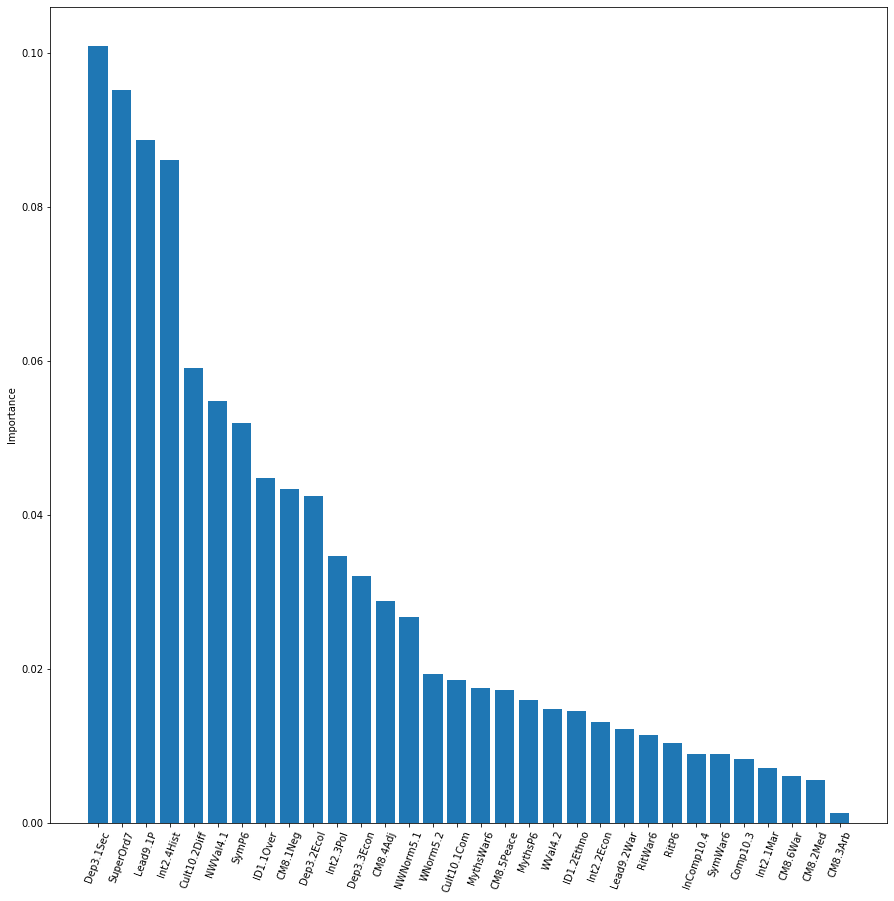

In [21]:
plt.bar(range(X.shape[1]), rfc_importances[rfc_indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[rfc_indices], rotation=70)
plt.ylabel('Importance')
plt.show()

# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logreg = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')

# fit the model with data
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
logreg_pred = logreg.predict(X_test)

In [25]:
print('Accuracy: ', accuracy_score(y_test, logreg_pred))
print('F1 Score: ', f1_score(y_test, logreg_pred, average='weighted'))
print('Recall Score: ', recall_score(y_test, logreg_pred, average='weighted'))

Accuracy:  0.875
F1 Score:  0.8645833333333333
Recall Score:  0.875


In [26]:
cnf_matrix = metrics.confusion_matrix(y_test, logreg_pred)

cnf_matrix

array([[ 3,  2],
       [ 0, 11]])

# Feature Importance For Logistic Regression

In [27]:
logreg_importances = np.abs(logreg.coef_[0])
logreg_indices = np.argsort(logreg_importances)[::-1]

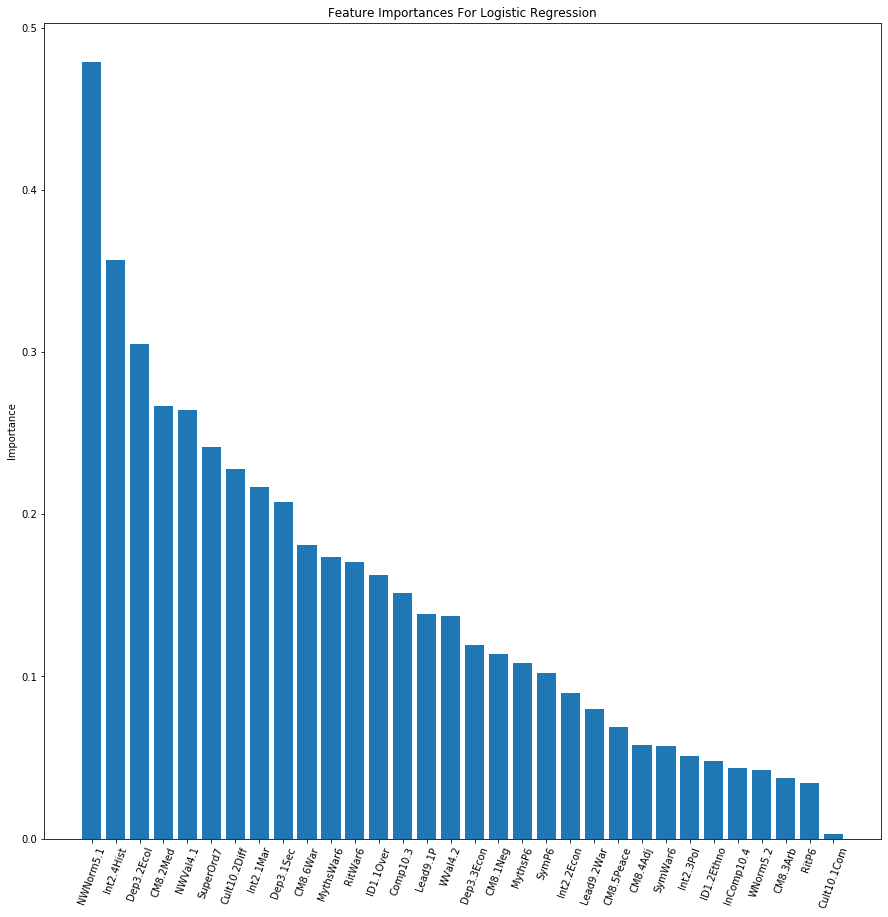

In [28]:
plt.figure()
plt.title('Feature Importances For Logistic Regression')
plt.bar(range(X.shape[1]), logreg_importances[logreg_indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[logreg_indices], rotation = 70)
plt.ylabel('Importance')
plt.show()

# Comparing Random Forest and Logistic Regression Rankings

In [29]:
importances = pd.DataFrame.from_dict({'Random_Forest' : rfc_indices, 'Logistic_Regression' :  logreg_indices}, orient='index')

importances

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
Random_Forest,6,19,26,5,29,9,17,0,20,7,...,27,16,15,31,18,30,2,25,21,22
Logistic_Regression,11,5,7,21,9,19,29,2,6,25,...,24,23,18,4,1,31,12,22,15,28


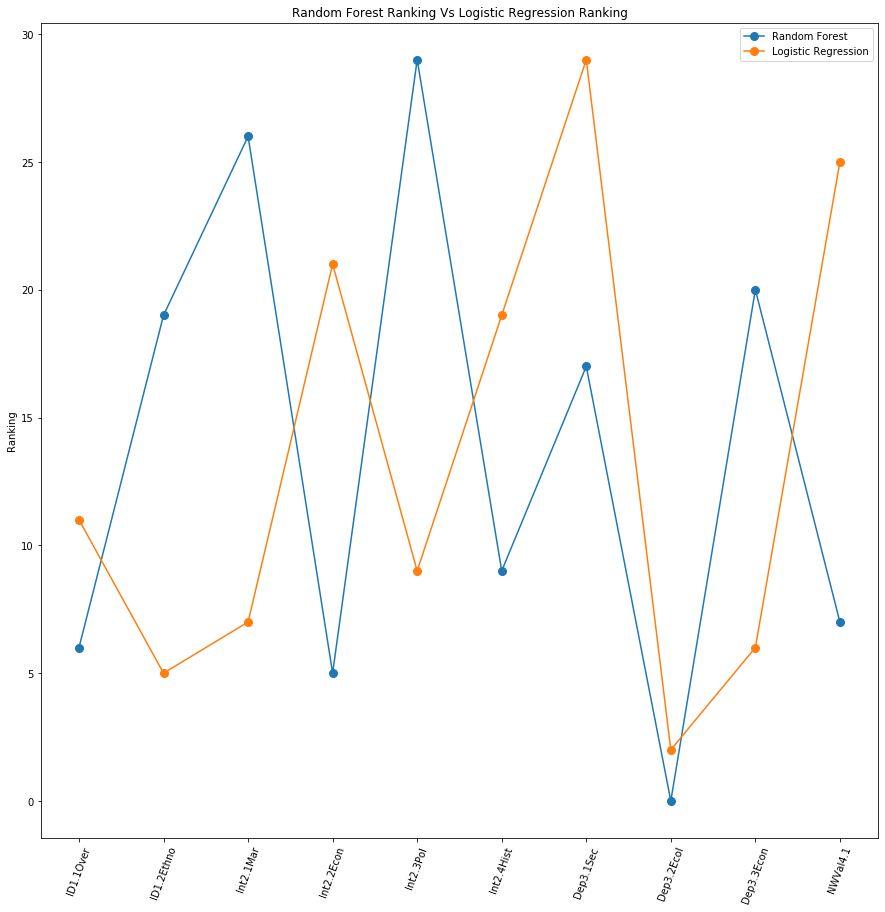

In [30]:
plt.figure()
plt.title('Random Forest Ranking Vs Logistic Regression Ranking')
plt.plot(X.columns[:10], importances.T[:10], marker='o' ,markersize=8)
plt.xticks(rotation=70)
plt.ylabel('Ranking')
plt.legend(['Random Forest', 'Logistic Regression'])
plt.show()

# Normalizing Data

In [31]:
rfc_cum_dist = []
logreg_cum_dist = []

# cumulative distribution of Random Forest Importances
for i in range(len(rfc_importances)):
    cum_dist = rfc_importances[i]
    for j in range(i + 1, len(rfc_importances) - 1):
        cum_dist += rfc_importances[j]
    rfc_cum_dist.append(cum_dist)

# cumulative distribution of Logistic Regression Importances
for i in range(len(logreg_importances)):
    cum_dist = logreg_importances[i]
    for j in range(i + 1, len(logreg_importances) - 1):
        cum_dist += logreg_importances[j]
    logreg_cum_dist.append(cum_dist)   

In [32]:
A = rfc_cum_dist[0]
for i in range(len(rfc_cum_dist)):
    rfc_cum_dist[i] = rfc_cum_dist[i] / A

A = logreg_cum_dist[0]
for i in range(len(logreg_cum_dist)):
    logreg_cum_dist[i] = logreg_cum_dist[i] / A

In [33]:
product_of_distributions = []
sum_of_distributions = []

for i in range(len(rfc_cum_dist)):
    product_of_distributions.append(rfc_cum_dist[i] * logreg_cum_dist[i])
    sum_of_distributions.append(rfc_cum_dist[i] + logreg_cum_dist[i])

In [34]:
dist_df = pd.DataFrame.from_dict({'Product' : product_of_distributions, 'Sum' : sum_of_distributions})

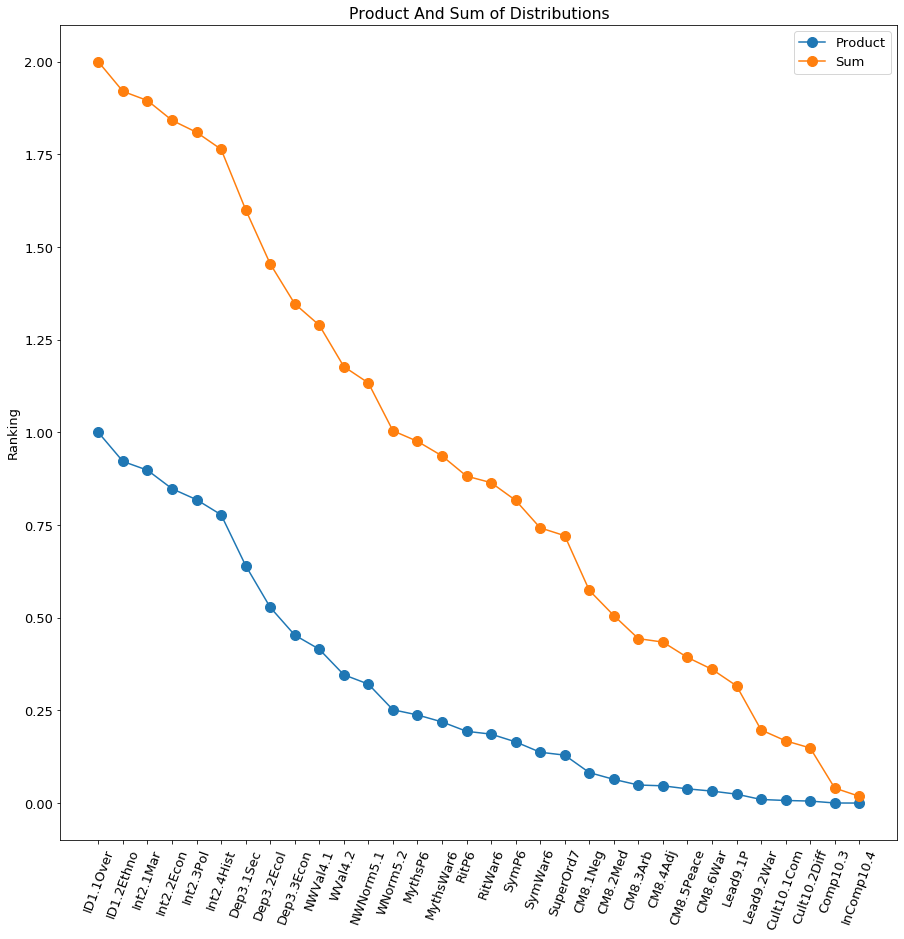

In [35]:
plt.figure()
plt.rcParams.update({'font.size' : 13})
plt.title('Product And Sum of Distributions')
plt.plot(X.columns, dist_df, marker='o' ,markersize=10)
plt.xticks(rotation=70)
plt.ylabel('Ranking')
plt.legend(['Product', 'Sum'])
plt.show()

In [36]:
importances_df = pd.DataFrame.from_dict({'Random Forest' : rfc_importances, 'Logistic Regression' : logreg_importances})
importances_norm = (importances_df - importances_df.mean()) / (importances_df.max() - importances_df.min())

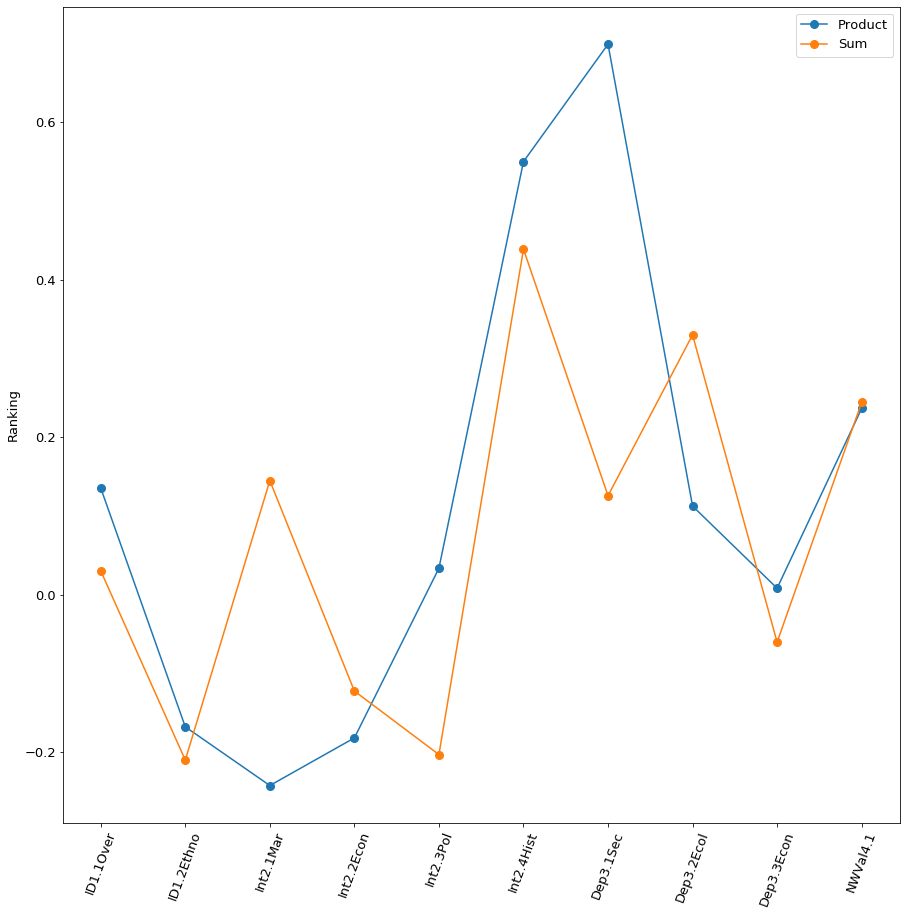

In [37]:
plt.figure()
plt.rcParams.update({'font.size' : 13})
plt.title('')
plt.plot(X.columns[:10], importances_norm[:10], marker='o' ,markersize=8)
plt.xticks(rotation=70)
plt.ylabel('Ranking')
plt.legend(['Product', 'Sum'])
plt.show()

In [48]:
sum_of_importances = []

for i in range(len(rfc_importances)):
    sum_of_importances.append(rfc_importances[i] + logreg_importances[i])

sorted_indices_sum = np.argsort(sum_of_importances)[::-1]

sum_importances_df = pd.DataFrame.from_dict({'Random Forest' : rfc_importances[sorted_indices_sum], 'Logistic Regression' : logreg_importances[sorted_indices_sum]})

# Ranking Features Base On Sum Of Scores

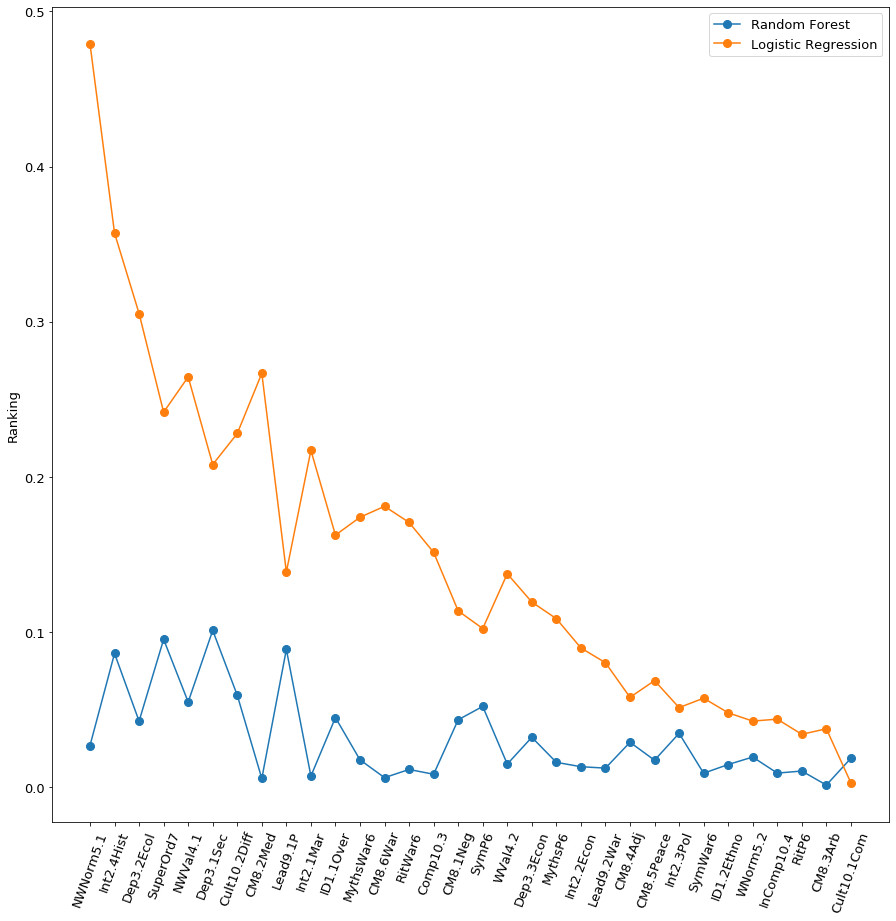

In [50]:
plt.figure()
plt.rcParams.update({'font.size' : 13})
plt.title('')
plt.plot(sum_importances_df, marker='o' ,markersize=8)
plt.xticks(range(X.shape[1]), X.columns[sorted_indices_sum],rotation=70)
plt.ylabel('Scores')
plt.legend(['Random Forest', 'Logistic Regression'])
plt.show()

# Ranking Features Based On Product Of Scores

In [52]:
product_of_importances = []

for i in range(len(rfc_importances)):
    product_of_importances.append(rfc_importances[i] * logreg_importances[i])

sorted_indices_product = np.argsort(product_of_importances)[::-1]
product_importances_df = pd.DataFrame.from_dict({'Random Forest' : rfc_importances[sorted_indices_product], 'Logistic Regression' : logreg_importances[sorted_indices_product]})



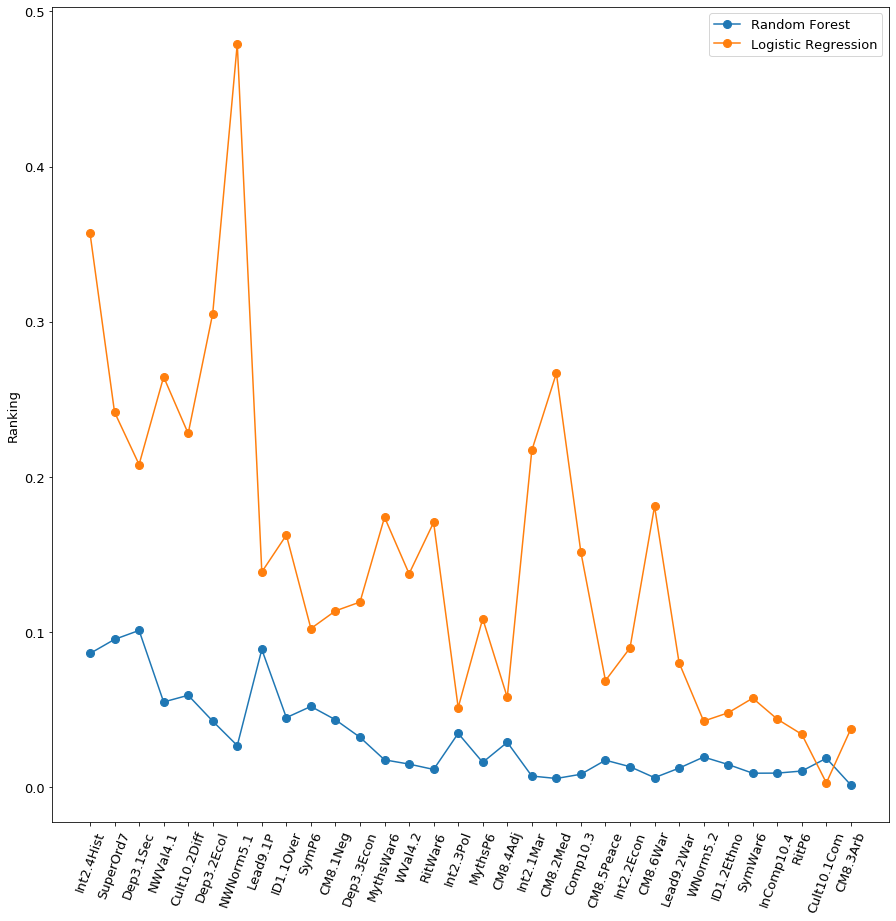

In [53]:
plt.figure()
plt.rcParams.update({'font.size' : 13})
plt.title('')
plt.plot(product_importances_df, marker='o' ,markersize=8)
plt.xticks(range(X.shape[1]), X.columns[sorted_indices_product],rotation=70)
plt.ylabel('Scores')
plt.legend(['Random Forest', 'Logistic Regression'])
plt.show()